In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
dictFromMatlab = sio.loadmat('C:/Users/17613/Documents/Calculations/calculations cloud/Matlab/ymy24.mat')
data = dictFromMatlab['ymy24'].T
h = tf.Variable(0.5, dtype = tf.float32)

mu1 = tf.Variable(12.0, dtype = tf.float32)
mu2 = tf.Variable(19.0, dtype = tf.float32)
delta1 = tf.Variable(1.0, dtype = tf.float32)
delta2 = tf.Variable(1.0, dtype = tf.float32)

dist = lambda arg: (arg + 12) % 24 -12

init = tf.global_variables_initializer()

x = tf.placeholder(tf.float32, [None, 1])
t1 = 1/np.sqrt(2*np.pi)/delta1*tf.exp(-(dist(x - mu1))**2/2/(delta1)**2)
t2 = 1/np.sqrt(2*np.pi)/delta2*tf.exp(-(dist(x - mu2))**2/2/(delta2)**2)
f = (tf.sin(h))**2*t1 + (tf.cos(h))**2*t2
entropy = -tf.reduce_sum(tf.log(f))

loss = entropy

train_step = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)
#train_step = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False)

with tf.Session() as sess:
    sess.run(init)
    for _ in range(100):
        sess.run(train_step, feed_dict={x:data})
        
        print('eeeeeeeeeeeeeeeeeeeee')
        print(sess.run(delta1, feed_dict={x:data}))
        print(sess.run(delta2, feed_dict={x:data}))
        print(sess.run(h, feed_dict={x:data}))
        print(sess.run(mu1, feed_dict={x:data}))
        print(sess.run(mu2, feed_dict={x:data}))
        print(sess.run(loss, feed_dict={x:data}))




eeeeeeeeeeeeeeeeeeeee
1.1197835
1.3832217
0.57906723
11.98574
19.08212
34452.277
eeeeeeeeeeeeeeeeeeeee
1.1665066
1.5248417
0.6165025
11.97629
19.123379
32300.389
eeeeeeeeeeeeeeeeeeeee
1.202189
1.624661
0.6379313
11.967977
19.156334
31156.346
eeeeeeeeeeeeeeeeeeeee
1.2315356
1.7030231
0.6505215
11.960459
19.184658
30423.479
eeeeeeeeeeeeeeeeeeeee
1.2565923
1.7678974
0.65794486
11.953538
19.209867
29905.541
eeeeeeeeeeeeeeeeeeeee
1.2784557
1.8233987
0.6622767
11.947093
19.232782
29516.254
eeeeeeeeeeeeeeeeeeeee
1.2978191
1.8719562
0.66473913
11.941042
19.253908
29211.186
eeeeeeeeeeeeeeeeeeeee
1.3151599
1.9151359
0.6660685
11.935323
19.273582
28964.756
eeeeeeeeeeeeeeeeeeeee
1.3308246
1.9540132
0.6667144
11.929891
19.292046
28761.111
eeeeeeeeeeeeeeeeeeeee
1.3450751
1.9893615
0.66694826
11.92471
19.309479
28589.797
eeeeeeeeeeeeeeeeeeeee
1.3581148
2.0217566
0.66693956
11.919754
19.32602
28443.527
eeeeeeeeeeeeeeeeeeeee
1.3701056
2.0516405
0.6667887
11.914999
19.341776
28317.178
eeeeeeeeeeeeeeeeee

iteration round 0
delta1=2.0460079
delta2=2.5394938
h1=0.4564098
mu1=11.751178
mu2=20.34172
entropy=26993.896
iteration round 200
delta1=1.519943
delta2=2.8491824
h1=0.37283373
mu1=11.728359
mu2=20.425116
entropy=26792.545
iteration round 400
delta1=1.5199428
delta2=2.8491843
h1=0.37283373
mu1=11.72836
mu2=20.425116
entropy=26792.545
iteration round 600
delta1=1.5199424
delta2=2.849185
h1=0.37283367
mu1=11.72836
mu2=20.425116
entropy=26792.545
iteration round 800
delta1=1.5199424
delta2=2.8491826
h1=0.37283364
mu1=11.728359
mu2=20.425116
entropy=26792.543
iteration round 1000
delta1=1.5199424
delta2=2.8491833
h1=0.37283364
mu1=11.728359
mu2=20.425116
entropy=26792.543
iteration round 1200
delta1=1.5199428
delta2=2.8491845
h1=0.37283373
mu1=11.728359
mu2=20.425116
entropy=26792.545
iteration round 1400
delta1=1.5199426
delta2=2.8491824
h1=0.37283367
mu1=11.728359
mu2=20.425116
entropy=26792.543
iteration round 1600
delta1=1.5199424
delta2=2.8491828
h1=0.37283364
mu1=11.728359
mu2=20.425

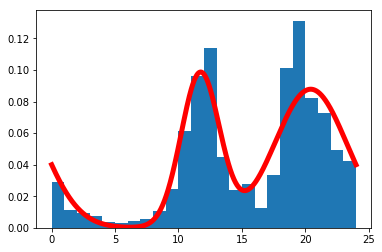

In [9]:
# 程序上可行但是结果不是很好的一个拟合

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

dictFromMatlab = sio.loadmat('C:/Users/17613/Documents/Calculations/calculations cloud/Matlab/ymy24.mat')
data = dictFromMatlab['ymy24'].T

h = tf.Variable(0.0 , dtype = tf.float32)
mu1_ori = tf.Variable(0.0, dtype = tf.float32)
mu2_ori = tf.Variable(0.0, dtype = tf.float32)
delta1_ori = tf.Variable(0.0, dtype = tf.float32)
delta2_ori = tf.Variable(0.0, dtype = tf.float32)

#delta1 = 4*tf.sigmoid(delta1_ori)
#delta2 = 4*tf.sigmoid(delta2_ori)
#mu1 = 12 + 2*tf.sigmoid(mu1_ori)
#mu2 = 20 + 2*tf.sigmoid(mu2_ori)
#h1 = tf.sigmoid(h)
#h2 = 1 - tf.sigmoid(h)

delta1 = 4*tf.sigmoid(delta1_ori)
delta2 = 4*tf.sigmoid(delta2_ori)
mu1 = 12 + 2*tf.nn.tanh(mu1_ori)
mu2 = 19 + 2*tf.nn.tanh(mu2_ori)
h1 = tf.sigmoid(h)
h2 = 1 - tf.sigmoid(h)


dist = lambda arg: (arg + 12) % 24 -12

init = tf.global_variables_initializer()

x = tf.placeholder(tf.float32, [None, 1])
t1 = 1/np.sqrt(2*np.pi)/delta1*tf.exp(-(dist(x - mu1))**2/2/(delta1)**2)
t2 = 1/np.sqrt(2*np.pi)/delta2*tf.exp(-(dist(x - mu2))**2/2/(delta2)**2)
f = tf.sigmoid(h)*t1 + (1 - tf.sigmoid(h))*t2
entropy = -tf.reduce_sum(tf.log(f))

loss = entropy

train_step = tf.train.GradientDescentOptimizer(0.0002).minimize(loss)
#train_step = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False)

with tf.Session() as sess:
    sess.run(init)
    for step in range(5000):
        sess.run(train_step, feed_dict={x:data})
        if step%200 == 0:
            print('======================================================')
            print("iteration round " + str(step))
            print("delta1=" + str(sess.run(delta1, feed_dict={x:data})))
            print("delta2=" + str(sess.run(delta2, feed_dict={x:data})))
            print("h1=" + str(sess.run(h1, feed_dict={x:data})))
            print("mu1=" + str(sess.run(mu1, feed_dict={x:data})))
            print("mu2=" + str(sess.run(mu2, feed_dict={x:data})))
            print("entropy=" + str(sess.run(entropy, feed_dict={x:data})))
            
    vx = np.linspace(0, 24, 1000)[:,np.newaxis]
    disfunc = sess.run(f, feed_dict={x:vx})
    plt.figure()
    plt.hist(data,24, density = True)
    plt.plot(vx, disfunc, 'r-', lw=5)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


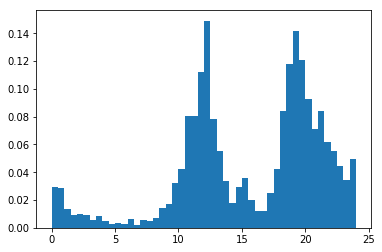

In [133]:
plt.figure()
plt.hist(data,48, normed = True)
plt.show()

In [79]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(t1, feed_dict={x:data}))

[[2.4280000e-32 2.6299849e-32 2.6563616e-32 ... 2.8391395e-32
  2.7280623e-32 2.5102194e-32]]


In [11]:
x = tf.placeholder(tf.float32, [1, None])
t1 = 1/np.sqrt(2*np.pi)/delta1*tf.exp(-(dist(x - mu1))**2/2/(delta1)**2)
t2 = 1/np.sqrt(2*np.pi)/delta2*tf.exp(-(dist(x - mu2))**2/2/(delta2)**2)
f = h*t1 + (1-h)*t2
entropy = -tf.reduce_sum(tf.log(f))

loss = entropy



In [12]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [29]:
x_data = np.linspace(1, 10, 10)[np.newaxis,:]

In [51]:
with tf.Session() as sess:
    sess.run(init)
    for _ in range(20):
        sess.run(train_step, feed_dict={x:x_data})
        
    print(sess.run(delta1, feed_dict={x:x_data}))
    print(sess.run(delta2, feed_dict={x:x_data}))
    print(sess.run(h, feed_dict={x:x_data}))
    print(sess.run(mu1, feed_dict={x:x_data}))
    print(sess.run(mu2, feed_dict={x:x_data}))
    #prediction_value = sess.run(prediction, feed_dict={x:x_data})
    #plt.figure()
   # plt.scatter(x_data, y_data)
   # plt.plot(x_data, prediction_value, 'r-', lw=5)
   # plt.show()

20.520992
14.828613
-1.2524248
8.482821
21.529398


In [49]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(delta1, feed_dict={x:x_data}))

1.0


In [40]:
loss

<tf.Tensor 'Neg_2:0' shape=() dtype=float32>

In [99]:
ymy24.shape

NameError: name 'ymy24' is not defined

In [100]:
data.shape

(1, 9475)

In [104]:
data.T.shape

(9475, 1)

iteration round 0
Learning rate 0.0001
delta1=2.023007
delta2=2.274841
h1=0.47816336
mu1=11.875104
mu2=19.770401
entropy=27407.238
iteration round 20
Learning rate 9.046104802746175e-05
delta1=1.670472
delta2=2.6445777
h1=0.38931686
mu1=11.777432
mu2=20.45227
entropy=26809.158
iteration round 40
Learning rate 8.183201210226743e-05
delta1=1.5864741
delta2=2.7388258
h1=0.38096023
mu1=11.753927
mu2=20.46766
entropy=26796.365
iteration round 60
Learning rate 7.402609576967046e-05
delta1=1.5581912
delta2=2.7821116
h1=0.3777296
mu1=11.744347
mu2=20.459713
entropy=26793.918
iteration round 80
Learning rate 6.696478204705642e-05
delta1=1.5445194
delta2=2.8050575
h1=0.3760557
mu1=11.7390785
mu2=20.450834
entropy=26793.146
iteration round 100
Learning rate 6.057704364907279e-05
delta1=1.5368154
delta2=2.8184931
h1=0.3750748
mu1=11.735878
mu2=20.444021
entropy=26792.83
iteration round 120
Learning rate 5.479862854900422e-05
delta1=1.5320886
delta2=2.8269105
h1=0.37445948
mu1=11.73383
mu2=20.43919

iteration round 820
Learning rate 1.6403110536014437e-06
delta1=1.5206333
delta2=2.8478913
h1=0.37292838
mu1=11.728674
mu2=20.425938
entropy=26792.533
iteration round 840
Learning rate 1.483842569998166e-06
delta1=1.5206277
delta2=2.8479018
h1=0.37292752
mu1=11.728671
mu2=20.42593
entropy=26792.53
iteration round 860
Learning rate 1.3422995398979637e-06
delta1=1.5206225
delta2=2.8479114
h1=0.3729267
mu1=11.728668
mu2=20.425924
entropy=26792.53
iteration round 880
Learning rate 1.2142582314594952e-06
delta1=1.5206181
delta2=2.84792
h1=0.372926
mu1=11.728666
mu2=20.425919
entropy=26792.53
iteration round 900
Learning rate 1.0984307219379815e-06
delta1=1.5206139
delta2=2.8479276
h1=0.3729254
mu1=11.728664
mu2=20.425915
entropy=26792.531
iteration round 920
Learning rate 9.936519429207124e-07
delta1=1.5206101
delta2=2.8479347
h1=0.37292486
mu1=11.7286625
mu2=20.425909
entropy=26792.533
iteration round 940
Learning rate 8.988679613113126e-07
delta1=1.5206068
delta2=2.847941
h1=0.37292433
mu

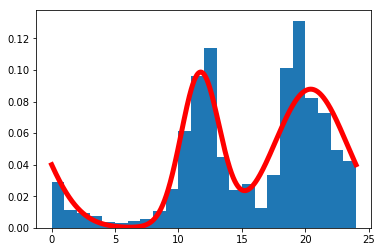

In [166]:
# 成功

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import binom, norm, beta, expon

dictFromMatlab = sio.loadmat('E:/Calculations/calculations cloud/Matlab/ymy24')
data = dictFromMatlab['ymy24'].T

lr = tf.Variable(1, dtype = tf.float32)
h = tf.Variable(0.0 , dtype = tf.float32)
mu1_ori = tf.Variable(0.0, dtype = tf.float32)
mu2_ori = tf.Variable(0.0, dtype = tf.float32)
delta1_ori = tf.Variable(0.0, dtype = tf.float32)
delta2_ori = tf.Variable(0.0, dtype = tf.float32)


delta1 = 4*tf.sigmoid(delta1_ori)
delta2 = 4*tf.sigmoid(delta2_ori)
mu1 = 12 + 2*tf.nn.tanh(mu1_ori)
mu2 = 19 + 2*tf.nn.tanh(mu2_ori)
h1 = tf.sigmoid(h)
h2 = 1 - tf.sigmoid(h)


dist = lambda arg: (arg + 12) % 24 -12

init = tf.global_variables_initializer()

x = tf.placeholder(tf.float32, [None, 1])

#t1 = norm.pdf(dist(x-mu1), 0, delta1)
#t2 = norm.pdf(dist(x-mu2), 0, delta2)
t1 = 1/np.sqrt(2*np.pi)/delta1*tf.exp(-(dist(x - mu1))**2/2/(delta1)**2)
t2 = 1/np.sqrt(2*np.pi)/delta2*tf.exp(-(dist(x - mu2))**2/2/(delta2)**2)
f = tf.sigmoid(h)*t1 + (1 - tf.sigmoid(h))*t2
entropy = -tf.reduce_sum(tf.log(f))

loss = entropy

train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)
#train_step = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False)

with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        sess.run(tf.assign(lr, 0.0001*(0.995**step)))
        sess.run(train_step, feed_dict={x:data})
        if step%20 == 0:
            print('======================================================')
            print("iteration round " + str(step))
            print("Learning rate " + str(0.0001*(0.995**step)))
            print("delta1=" + str(sess.run(delta1, feed_dict={x:data})))
            print("delta2=" + str(sess.run(delta2, feed_dict={x:data})))
            print("h1=" + str(sess.run(h1, feed_dict={x:data})))
            print("mu1=" + str(sess.run(mu1, feed_dict={x:data})))
            print("mu2=" + str(sess.run(mu2, feed_dict={x:data})))
            print("entropy=" + str(sess.run(entropy, feed_dict={x:data})))
            
    vx = np.linspace(0, 24, 1000)[:,np.newaxis]
    disfunc = sess.run(f, feed_dict={x:vx})
    plt.figure()
    plt.hist(data,24, density = True)
    plt.plot(vx, disfunc, 'r-', lw=5)
    plt.show()

In [153]:
data.shape

(9475, 1)

In [155]:
norm.pdf(dist(data-mu1), 0, 2)

TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use TensorFlow ops such as tf.cond to execute subgraphs conditioned on the value of a tensor.

iteration round 0
Learning rate 0.0001
delta1=2.0230067
delta2=2.2748404
h1=0.47816336
mu1=11.875104
mu2=19.770401
entropy=27407.238
iteration round 20
Learning rate 9.046104802746175e-05
delta1=1.6704718
delta2=2.6445775
h1=0.3893169
mu1=11.777433
mu2=20.45227
entropy=26809.16
iteration round 40
Learning rate 8.183201210226743e-05
delta1=1.5864743
delta2=2.7388241
h1=0.38096026
mu1=11.753927
mu2=20.46766
entropy=26796.365
iteration round 60
Learning rate 7.402609576967046e-05
delta1=1.5581911
delta2=2.7821112
h1=0.37772962
mu1=11.744346
mu2=20.459713
entropy=26793.918
iteration round 80
Learning rate 6.696478204705642e-05
delta1=1.5445194
delta2=2.8050563
h1=0.37605587
mu1=11.7390785
mu2=20.450834
entropy=26793.145


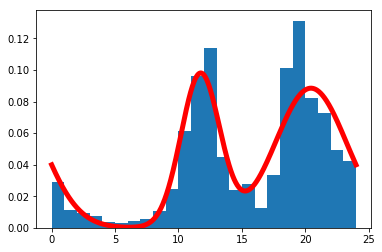

In [179]:
# Regression by the normal distribution function. Where the mu1, mu2 are expection value, and sigma1, sigma2 is the sqrt of variance. 
# the h decides the partipation among the two peaks. 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
#from scipy.stats import binom, norm, beta, expon

#import data from the file ymy24.mat 
dictFromMatlab = sio.loadmat('E:/Calculations/calculations cloud/Matlab/ymy24')
data = dictFromMatlab['ymy24'].T

# the Learning rate
lr = tf.Variable(1, dtype = tf.float32)

# 5 parameters in the hypothsis distribution function
h = tf.Variable(0.0 , dtype = tf.float32)
mu1_ori = tf.Variable(0.0, dtype = tf.float32)
mu2_ori = tf.Variable(0.0, dtype = tf.float32)
delta1_ori = tf.Variable(0.0, dtype = tf.float32)
delta2_ori = tf.Variable(0.0, dtype = tf.float32)

# the choose of the activation function
delta1 = 4*tf.sigmoid(delta1_ori)
delta2 = 4*tf.sigmoid(delta2_ori)
mu1 = 12 + 2*tf.nn.tanh(mu1_ori)
mu2 = 19 + 2*tf.nn.tanh(mu2_ori)
h1 = tf.sigmoid(h)
h2 = 1 - tf.sigmoid(h)

# inline function for the calculation of "mod 24"
dist = lambda arg: (arg + 12) % 24 -12

# inlitializer
init = tf.global_variables_initializer()

# placeholder for the input
x = tf.placeholder(tf.float32, [None, 1])

# distribution functions for the two peaks
dist1 = tf.contrib.distributions.Normal(0.0 , delta1)
dist2 = tf.contrib.distributions.Normal(0.0 , delta2)
t1 = dist1.prob(dist(x-mu1))
t2 = dist2.prob(dist(x-mu2))
#t1 = 1/np.sqrt(2*np.pi)/delta1*tf.exp(-(dist(x - mu1))**2/2/(delta1)**2)
#t2 = 1/np.sqrt(2*np.pi)/delta2*tf.exp(-(dist(x - mu2))**2/2/(delta2)**2)

# calculation of the entropy
f = tf.sigmoid(h)*t1 + (1 - tf.sigmoid(h))*t2
entropy = -tf.reduce_sum(tf.log(f))

# loss function
loss = entropy

#the trainer
train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)
#train_step = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False)

with tf.Session() as sess:
    sess.run(init)
    for step in range(100):
        sess.run(tf.assign(lr, 0.0001*(0.995**step)))
        sess.run(train_step, feed_dict={x:data})
        if step%20 == 0:
            print('======================================================')
            print("iteration round " + str(step))
            print("Learning rate " + str(0.0001*(0.995**step)))
            print("delta1=" + str(sess.run(delta1, feed_dict={x:data})))
            print("delta2=" + str(sess.run(delta2, feed_dict={x:data})))
            print("h1=" + str(sess.run(h1, feed_dict={x:data})))
            print("mu1=" + str(sess.run(mu1, feed_dict={x:data})))
            print("mu2=" + str(sess.run(mu2, feed_dict={x:data})))
            print("entropy=" + str(sess.run(entropy, feed_dict={x:data})))
            
    vx = np.linspace(0, 24, 1000)[:,np.newaxis]
    disfunc = sess.run(f, feed_dict={x:vx})
    plt.figure()
    plt.hist(data,24, density = True)
    plt.plot(vx, disfunc, 'r-', lw=5)
    plt.show()

In [171]:
x

<tf.Tensor 'Placeholder_92:0' shape=(?, 1) dtype=float32>

In [172]:
type(x)

tensorflow.python.framework.ops.Tensor

In [173]:
x+1

<tf.Tensor 'add_365:0' shape=(?, 1) dtype=float32>

iteration round 0
Learning rate 0.0001
delta1=1.9642392
delta2=2.042469
dim1=3.8417888
dim2=3.7527533
h1=0.4794675
mu1=11.960088
mu2=19.458807
entropy=27201.883


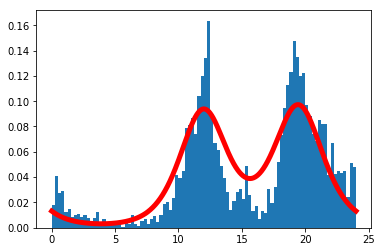

iteration round 10
Learning rate 9.51110130465772e-05
delta1=1.5743501
delta2=2.0547256
dim1=4.0396557
dim2=4.0664415
h1=0.40657344
mu1=11.888139
mu2=20.192371
entropy=26627.96


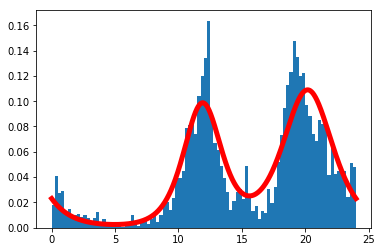

iteration round 20
Learning rate 9.046104802746175e-05
delta1=1.3643534
delta2=2.1119692
dim1=4.021173
dim2=4.1139216
h1=0.38964993
mu1=11.857179
mu2=20.241636
entropy=26560.723


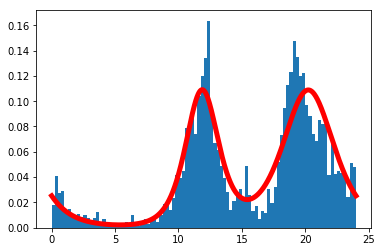

iteration round 30
Learning rate 8.603841919146961e-05
delta1=1.2728233
delta2=2.156241
dim1=3.7833993
dim2=4.131932
h1=0.38219258
mu1=11.844057
mu2=20.239912
entropy=26543.967


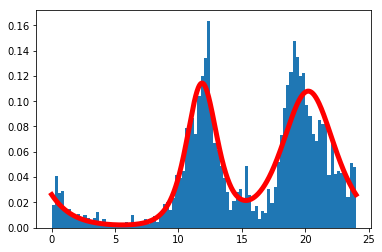

iteration round 40
Learning rate 8.183201210226743e-05
delta1=1.2283195
delta2=2.1825278
dim1=3.513793
dim2=4.1787815
h1=0.3791628
mu1=11.840051
mu2=20.233366
entropy=26538.293


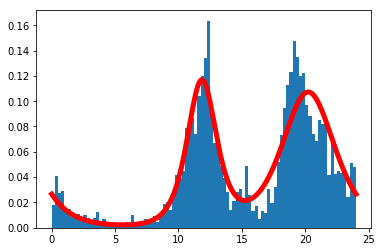

iteration round 50
Learning rate 7.783125570686419e-05
delta1=1.202706
delta2=2.1975613
dim1=3.2923396
dim2=4.2379117
h1=0.37825683
mu1=11.839596
mu2=20.229315
entropy=26535.744


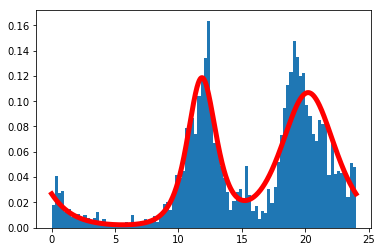

iteration round 60
Learning rate 7.402609576967046e-05
delta1=1.1863571
delta2=2.2064717
dim1=3.1353722
dim2=4.294434
h1=0.37820527
mu1=11.840224
mu2=20.22761
entropy=26534.518


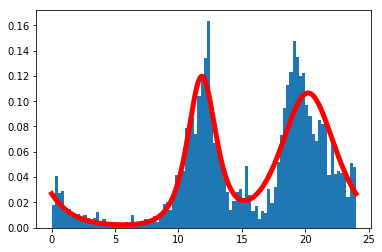

iteration round 70
Learning rate 7.040696960536298e-05
delta1=1.1755449
delta2=2.2121415
dim1=3.031627
dim2=4.3422966
h1=0.3784116
mu1=11.840983
mu2=20.227205
entropy=26533.945


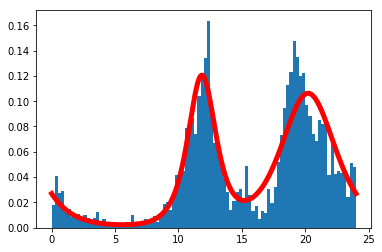

iteration round 80
Learning rate 6.696478204705642e-05
delta1=1.1683512
delta2=2.2160375
dim1=2.9646592
dim2=4.3807154
h1=0.3786464
mu1=11.841597
mu2=20.227386
entropy=26533.656


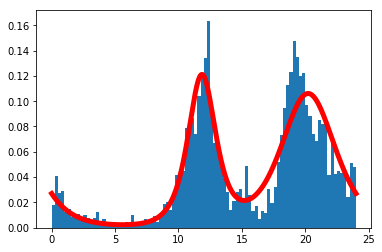

iteration round 90
Learning rate 6.369088258938781e-05
delta1=1.1635602
delta2=2.2188847
dim1=2.9213922
dim2=4.410939
h1=0.37884226
mu1=11.842033
mu2=20.227781
entropy=26533.508


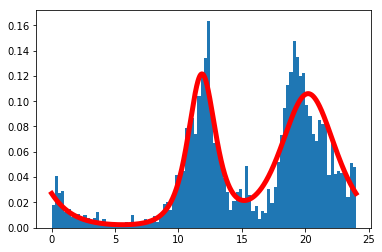

iteration round 100
Learning rate 6.057704364907279e-05
delta1=1.160357
delta2=2.2210562
dim1=2.8930984
dim2=4.434657
h1=0.37899107
mu1=11.84233
mu2=20.228222
entropy=26533.44


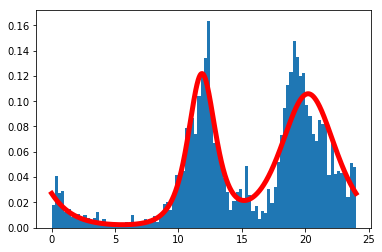

iteration round 110
Learning rate 5.761543988830038e-05
delta1=1.1581981
delta2=2.2227583
dim1=2.8742757
dim2=4.453357
h1=0.37910056
mu1=11.842527
mu2=20.228642
entropy=26533.402


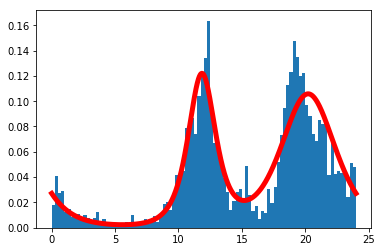

iteration round 120
Learning rate 5.479862854900422e-05
delta1=1.1567286
delta2=2.2241158
dim1=2.8615348
dim2=4.4682107
h1=0.3791811
mu1=11.842657
mu2=20.229017
entropy=26533.379


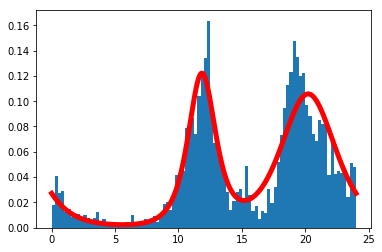

iteration round 130
Learning rate 5.211953074858876e-05
delta1=1.1557161
delta2=2.2252135
dim1=2.85276
dim2=4.480124
h1=0.37924033
mu1=11.842743
mu2=20.229342
entropy=26533.37


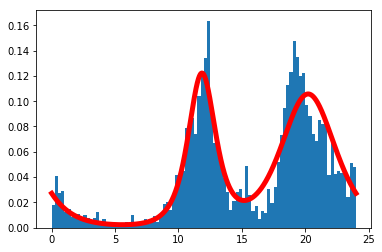

iteration round 140
Learning rate 4.957141369010507e-05
delta1=1.1550093
delta2=2.2261117
dim1=2.8466058
dim2=4.4897776
h1=0.37928492
mu1=11.8428
mu2=20.22962
entropy=26533.37


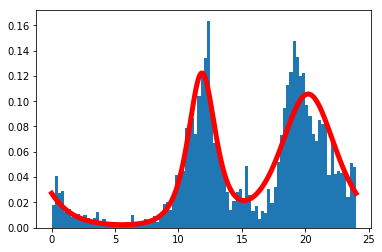

iteration round 150
Learning rate 4.714787374216858e-05
delta1=1.1545099
delta2=2.226851
dim1=2.8422067
dim2=4.4976683
h1=0.37931874
mu1=11.842837
mu2=20.229858
entropy=26533.357


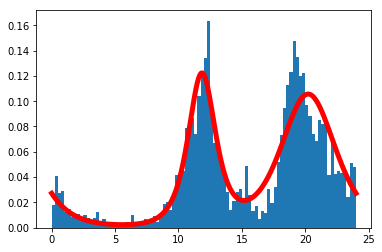

iteration round 160
Learning rate 4.4842820346097694e-05
delta1=1.1541519
delta2=2.2274642
dim1=2.839017
dim2=4.5041666
h1=0.37934473
mu1=11.842862
mu2=20.23006
entropy=26533.354


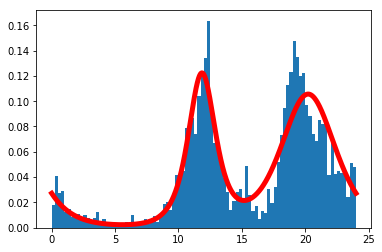

iteration round 170
Learning rate 4.2650460709830156e-05
delta1=1.1538925
delta2=2.2279763
dim1=2.8366802
dim2=4.509554
h1=0.37936497
mu1=11.842877
mu2=20.230232
entropy=26533.354


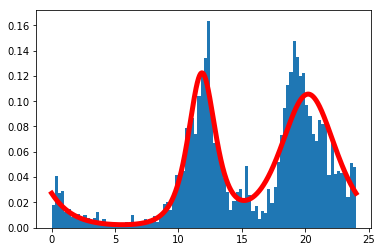

iteration round 180
Learning rate 4.056528525015183e-05
delta1=1.1537023
delta2=2.228407
dim1=2.8349197
dim2=4.514067
h1=0.379381
mu1=11.842888
mu2=20.23038
entropy=26533.352


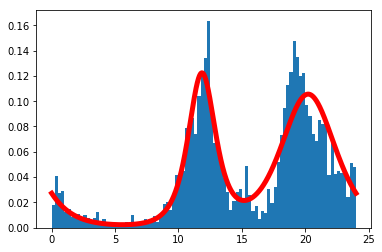

iteration round 190
Learning rate 3.8582053746653156e-05
delta1=1.1535604
delta2=2.2287712
dim1=2.8335867
dim2=4.517872
h1=0.37939408
mu1=11.842895
mu2=20.230505
entropy=26533.346


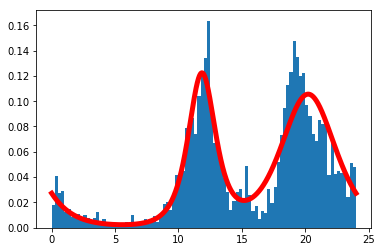

iteration round 200
Learning rate 3.669578217261671e-05
delta1=1.1534538
delta2=2.2290814
dim1=2.8325727
dim2=4.5210915
h1=0.37940472
mu1=11.842898
mu2=20.230614
entropy=26533.346


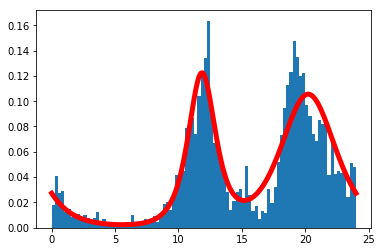

iteration round 210
Learning rate 3.490173016974102e-05
delta1=1.1533729
delta2=2.2293468
dim1=2.8317778
dim2=4.5238314
h1=0.37941337
mu1=11.842901
mu2=20.230707
entropy=26533.334


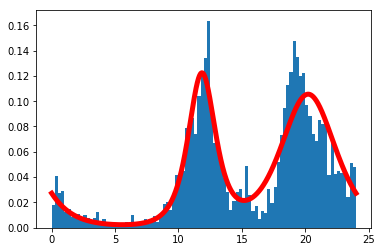

iteration round 220
Learning rate 3.3195389135223545e-05
delta1=1.153311
delta2=2.229575
dim1=2.831148
dim2=4.5261884
h1=0.37942064
mu1=11.842902
mu2=20.23079
entropy=26533.354


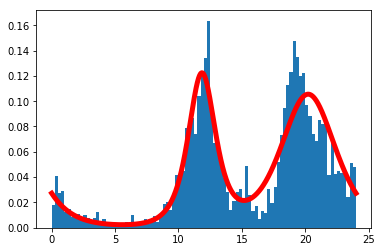

iteration round 230
Learning rate 3.1572470891264534e-05
delta1=1.1532632
delta2=2.229772
dim1=2.8306513
dim2=4.528224
h1=0.37942684
mu1=11.842903
mu2=20.23086
entropy=26533.355


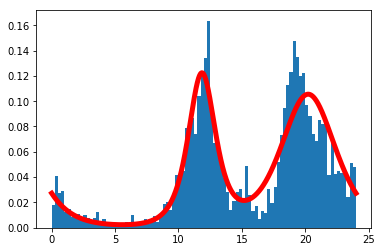

iteration round 240
Learning rate 3.0028896908517394e-05
delta1=1.1532255
delta2=2.2299433
dim1=2.8302438
dim2=4.529982
h1=0.37943205
mu1=11.842902
mu2=20.230923
entropy=26533.336


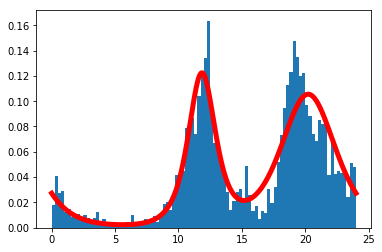

iteration round 250
Learning rate 2.8560788056403192e-05
delta1=1.1531959
delta2=2.2300925
dim1=2.8299108
dim2=4.531517
h1=0.37943658
mu1=11.842902
mu2=20.230976
entropy=26533.344


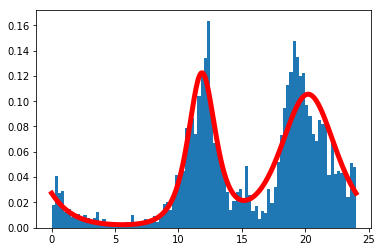

iteration round 260
Learning rate 2.71644548545309e-05
delta1=1.1531721
delta2=2.2302232
dim1=2.8296359
dim2=4.5328608
h1=0.3794405
mu1=11.842902
mu2=20.231024
entropy=26533.348


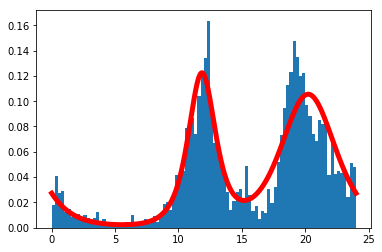

iteration round 270
Learning rate 2.5836388200724453e-05
delta1=1.1531532
delta2=2.230338
dim1=2.8294148
dim2=4.5340376
h1=0.3794439
mu1=11.842901
mu2=20.231066
entropy=26533.346


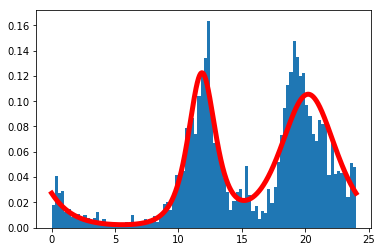

iteration round 280
Learning rate 2.4573250552355363e-05
delta1=1.1531379
delta2=2.2304394
dim1=2.8292315
dim2=4.5350795
h1=0.37944686
mu1=11.8429
mu2=20.231102
entropy=26533.352


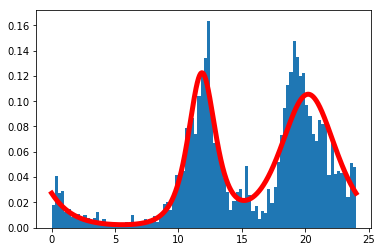

iteration round 290
Learning rate 2.337186753881881e-05
delta1=1.1531255
delta2=2.2305293
dim1=2.8290827
dim2=4.536
h1=0.37944946
mu1=11.842899
mu2=20.231136
entropy=26533.348


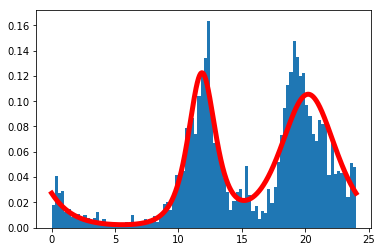

iteration round 300
Learning rate 2.2229219984074695e-05
delta1=1.1531154
delta2=2.2306094
dim1=2.8289535
dim2=4.5368147
h1=0.37945166
mu1=11.842899
mu2=20.231165
entropy=26533.352


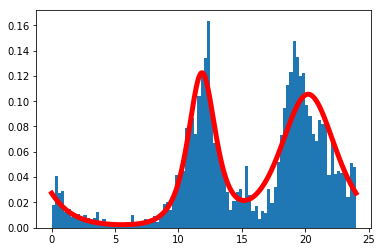

iteration round 310
Learning rate 2.1142436319205628e-05
delta1=1.1531072
delta2=2.2306805
dim1=2.8288445
dim2=4.537551
h1=0.3794536
mu1=11.842898
mu2=20.231192
entropy=26533.344


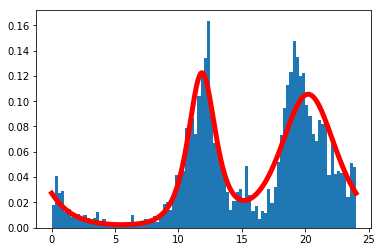

iteration round 320
Learning rate 2.0108785365923937e-05
delta1=1.1531005
delta2=2.2307444
dim1=2.828752
dim2=4.5382013
h1=0.3794554
mu1=11.842897
mu2=20.231216
entropy=26533.34


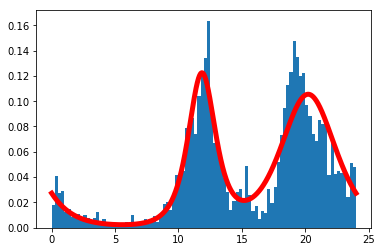

iteration round 330
Learning rate 1.912566947289212e-05
delta1=1.1530949
delta2=2.2308018
dim1=2.8286722
dim2=4.538782
h1=0.37945685
mu1=11.842896
mu2=20.231237
entropy=26533.352


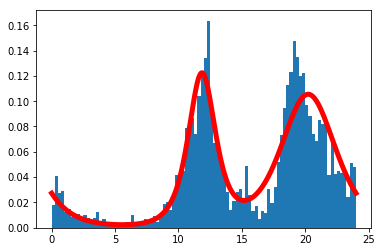

iteration round 340
Learning rate 1.819061798760765e-05
delta1=1.1530901
delta2=2.2308536
dim1=2.828597
dim2=4.5393057
h1=0.3794582
mu1=11.8428955
mu2=20.231256
entropy=26533.354


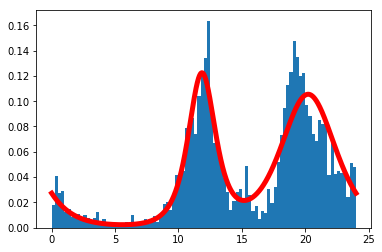

iteration round 350
Learning rate 1.730128104744653e-05
delta1=1.153086
delta2=2.2309
dim1=2.8285341
dim2=4.5397787
h1=0.37945935
mu1=11.8428955
mu2=20.231274
entropy=26533.35


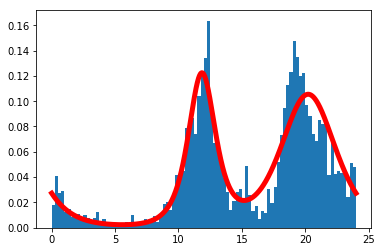

iteration round 360
Learning rate 1.6455423674261856e-05
delta1=1.1530825
delta2=2.2309422
dim1=2.8284752
dim2=4.5402102
h1=0.3794604
mu1=11.842895
mu2=20.231289
entropy=26533.354


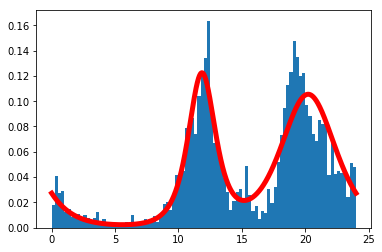

iteration round 370
Learning rate 1.5650920157696743e-05
delta1=1.1530793
delta2=2.2309806
dim1=2.8284268
dim2=4.5406
h1=0.37946135
mu1=11.842894
mu2=20.231304
entropy=26533.352


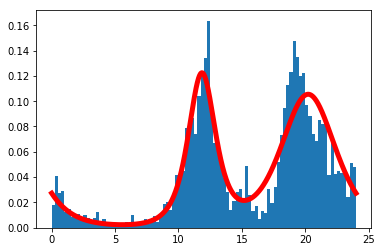

iteration round 380
Learning rate 1.4885748713096328e-05
delta1=1.1530766
delta2=2.2310154
dim1=2.828382
dim2=4.5409513
h1=0.37946224
mu1=11.842894
mu2=20.231318
entropy=26533.354


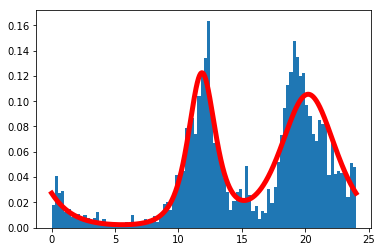

iteration round 390
Learning rate 1.4157986400593745e-05
delta1=1.1530741
delta2=2.231047
dim1=2.828346
dim2=4.5412755
h1=0.37946305
mu1=11.842893
mu2=20.231329
entropy=26533.354


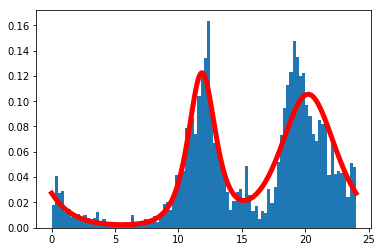

iteration round 400
Learning rate 1.3465804292601342e-05
delta1=1.1530721
delta2=2.231076
dim1=2.828309
dim2=4.54157
h1=0.37946376
mu1=11.842893
mu2=20.231339
entropy=26533.357


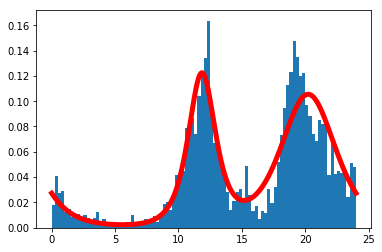

In [10]:
# Regression by the student distribution function. Where the mu1, mu2 are expection value, and sigma1, sigma2 is the sqrt of variance. 
# the dim1 and dim2 are dimensions for the two student distributions, the h decides the partipation among the two peaks. 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
#from scipy.stats import binom, norm, beta, expon

#import data from the file ymy24.mat 
dictFromMatlab = sio.loadmat('C:/Users/17613/Documents/Calculations/calculations cloud/Matlab/ymy24.mat')
data = dictFromMatlab['ymy24'].T

# the Learning rate
lr = tf.Variable(1, dtype = tf.float32)

# 7 parameters in the hypothsis distribution function
h = tf.Variable(0.0 , dtype = tf.float32)
mu1_ori = tf.Variable(0.0, dtype = tf.float32)
mu2_ori = tf.Variable(0.0, dtype = tf.float32)
delta1_ori = tf.Variable(0.0, dtype = tf.float32)
delta2_ori = tf.Variable(0.0, dtype = tf.float32)
dim1_ori = tf.Variable(0.0, dtype = tf.float32)
dim2_ori = tf.Variable(0.0, dtype = tf.float32)

# the choose of the activation function
delta1 = 4*tf.sigmoid(delta1_ori)
delta2 = 4*tf.sigmoid(delta2_ori)
mu1 = 12 + 2*tf.nn.tanh(mu1_ori)
mu2 = 19 + 2*tf.nn.tanh(mu2_ori)
dim1 = 8 * tf.sigmoid(dim1_ori * 4)
dim2 = 8 * tf.sigmoid(dim2_ori * 4)

h1 = tf.sigmoid(h)
h2 = 1 - tf.sigmoid(h)

# inline function for the calculation of "mod 24"
dist = lambda arg: (arg + 12) % 24 -12

# inlitializer
init = tf.global_variables_initializer()

# placeholder for the input
x = tf.placeholder(tf.float32, [None, 1])

# distribution functions for the two peaks
dist1 = tf.contrib.distributions.StudentT(dim1, 0.0 , delta1)
dist2 = tf.contrib.distributions.StudentT(dim2, 0.0 , delta2)
t1 = dist1.prob(dist(x-mu1))
t2 = dist2.prob(dist(x-mu2))
#t1 = 1/np.sqrt(2*np.pi)/delta1*tf.exp(-(dist(x - mu1))**2/2/(delta1)**2)
#t2 = 1/np.sqrt(2*np.pi)/delta2*tf.exp(-(dist(x - mu2))**2/2/(delta2)**2)

# calculation of the entropy
f = tf.sigmoid(h)*t1 + (1 - tf.sigmoid(h))*t2
entropy = -tf.reduce_sum(tf.log(f))

# loss function
loss = entropy

#the trainer
train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)
#train_step = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08, use_locking=False)

with tf.Session() as sess:
    sess.run(init)
    for step in range(401):
        sess.run(tf.assign(lr, 0.0001*(0.995**step)))
        sess.run(train_step, feed_dict={x:data})
        if step%10 == 0:
            print('======================================================')
            print("iteration round " + str(step))
            print("Learning rate " + str(0.0001*(0.995**step)))
            print("delta1=" + str(sess.run(delta1, feed_dict={x:data})))
            print("delta2=" + str(sess.run(delta2, feed_dict={x:data})))
            print("dim1=" + str(sess.run(dim1, feed_dict={x:data})))
            print("dim2=" + str(sess.run(dim2, feed_dict={x:data})))
            print("h1=" + str(sess.run(h1, feed_dict={x:data})))
            print("mu1=" + str(sess.run(mu1, feed_dict={x:data})))
            print("mu2=" + str(sess.run(mu2, feed_dict={x:data})))
            print("entropy=" + str(sess.run(entropy, feed_dict={x:data})))
            
            vx = np.linspace(0, 24, 1000)[:,np.newaxis]
            disfunc = sess.run(f, feed_dict={x:vx})
            plt.figure()
            plt.hist(data,96, density = True)
            plt.plot(vx, disfunc, 'r-', lw=5)
            plt.show()

In [ ]:
t = tf.V